# Import Library for Data Cleaning & Preliminary Research

In [1]:
# Importing all relevant libraries to clean and wrangling the dataset
# Data analysis libraries & graphic libraries
import pandas as pd
#Changing the max_rows value
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip install pyecharts
import pyecharts
!pip install missingno
import missingno as mso
from pyecharts.charts import Line,Map,Pie,Bar
import pyecharts.options as opts
try:
    assert pyecharts.__version__ == '1.9.1'
except:
    print(f"pyecharts version should be 1.9.1, your version is {pyecharts.__version__}")

pyecharts version should be 1.9.1, your version is 2.0.2


In [2]:
# Read in the dataset
# Check if the dataset has been imported into Colab appropriately
data = pd.read_csv("./Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [3]:
# Count the number of sample population of each race
data['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [4]:
# Check what columns is contained in the dataset
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch', 'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'], dtype='object')

## Descriptive Statistics

In [5]:
# Get the mean & STD of the dataset of each attribute
data.describe().loc[['mean','std']]

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423


In [6]:
data.describe() # all

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [7]:
# Descriptive data exploration of the arrest and strip record based on sex: Female and Male and Unknow
data.groupby(by='Sex').describe()

Arrest_Year                                                                 EventID                                                                                     ArrestID                                                                                      PersonID                                                                                StripSearch                                                Booked                                              Actions_at_arrest___Concealed_i                                              Actions_at_arrest___Combative__                                              Actions_at_arrest___Resisted__d                                              Actions_at_arrest___Mental_inst                                              Actions_at_arrest___Assaulted_o                                              Actions_at_arrest___Cooperative                                              SearchReason_CauseInjury                                               \
          count         mean       std     min     25%     50%     75%     max    count          mean           std        min         25%        50%        75%        max    count          mean           std        min         25%        50%         75%        max    count           mean           std       min       25%       50%       75%       max       count      mean       std  min  25%  50%  75%  max    count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                           count      mean       std  min  25%  50%  75%  max                    count      mean       std  min  25%  50%  75%  max   
Sex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
F       12617.0  2020.513514  0.499837  2020.0  2020.0  2021.0  2021.0  2021.0  12617.0  1.029868e+06  17396.461456  1000003.0  1014688.00  1030012.0  1044979.0  1060002.0  12542.0  6.032443e+06  18650.516453  6000000.0  6016269.75  6032579.5  6048520.75  6064801.0  12617.0  318662.857652  10718.537640  300001.0  309614.0  318587.0  327986.0  337335.0     12617.0  0.101688  0.302250  0.0  0.0  0.0  0.0  1.0  12617.0  0.435286  0.495814  0.0  0.0  0.0  1.0  1.0                         12617.0  0.001664  0.040765  0.0  0.0  0.0  0.0  1.0                         12617.0  0.044622  0.206481  0.0  0.0  0.0  0.0  1.0                         12617.0  0.034319  0.182054  0.0  0.0  0.0  0.0  1.0                         12617.0  0.040025  0.196026  0.0  0.0  0.0  0.0  1.0                         12617.0  0.008322  0.090849  0.0  0.0  0.0  0.0  1.0                         12617.0  0.430372  0.495148  0.0  0.0  0.0  1.0  1.0                   1283.0  0.767732  0.422444  0.0  1.0  1.0  1.0  1.0   
M   

# Data Manipulation and EDA

In [8]:
# Check the dimensions of the dataframe
data.shape

(65276, 25)

In [9]:
# Prints a concise summary of a pandas dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

## EDA of dataset

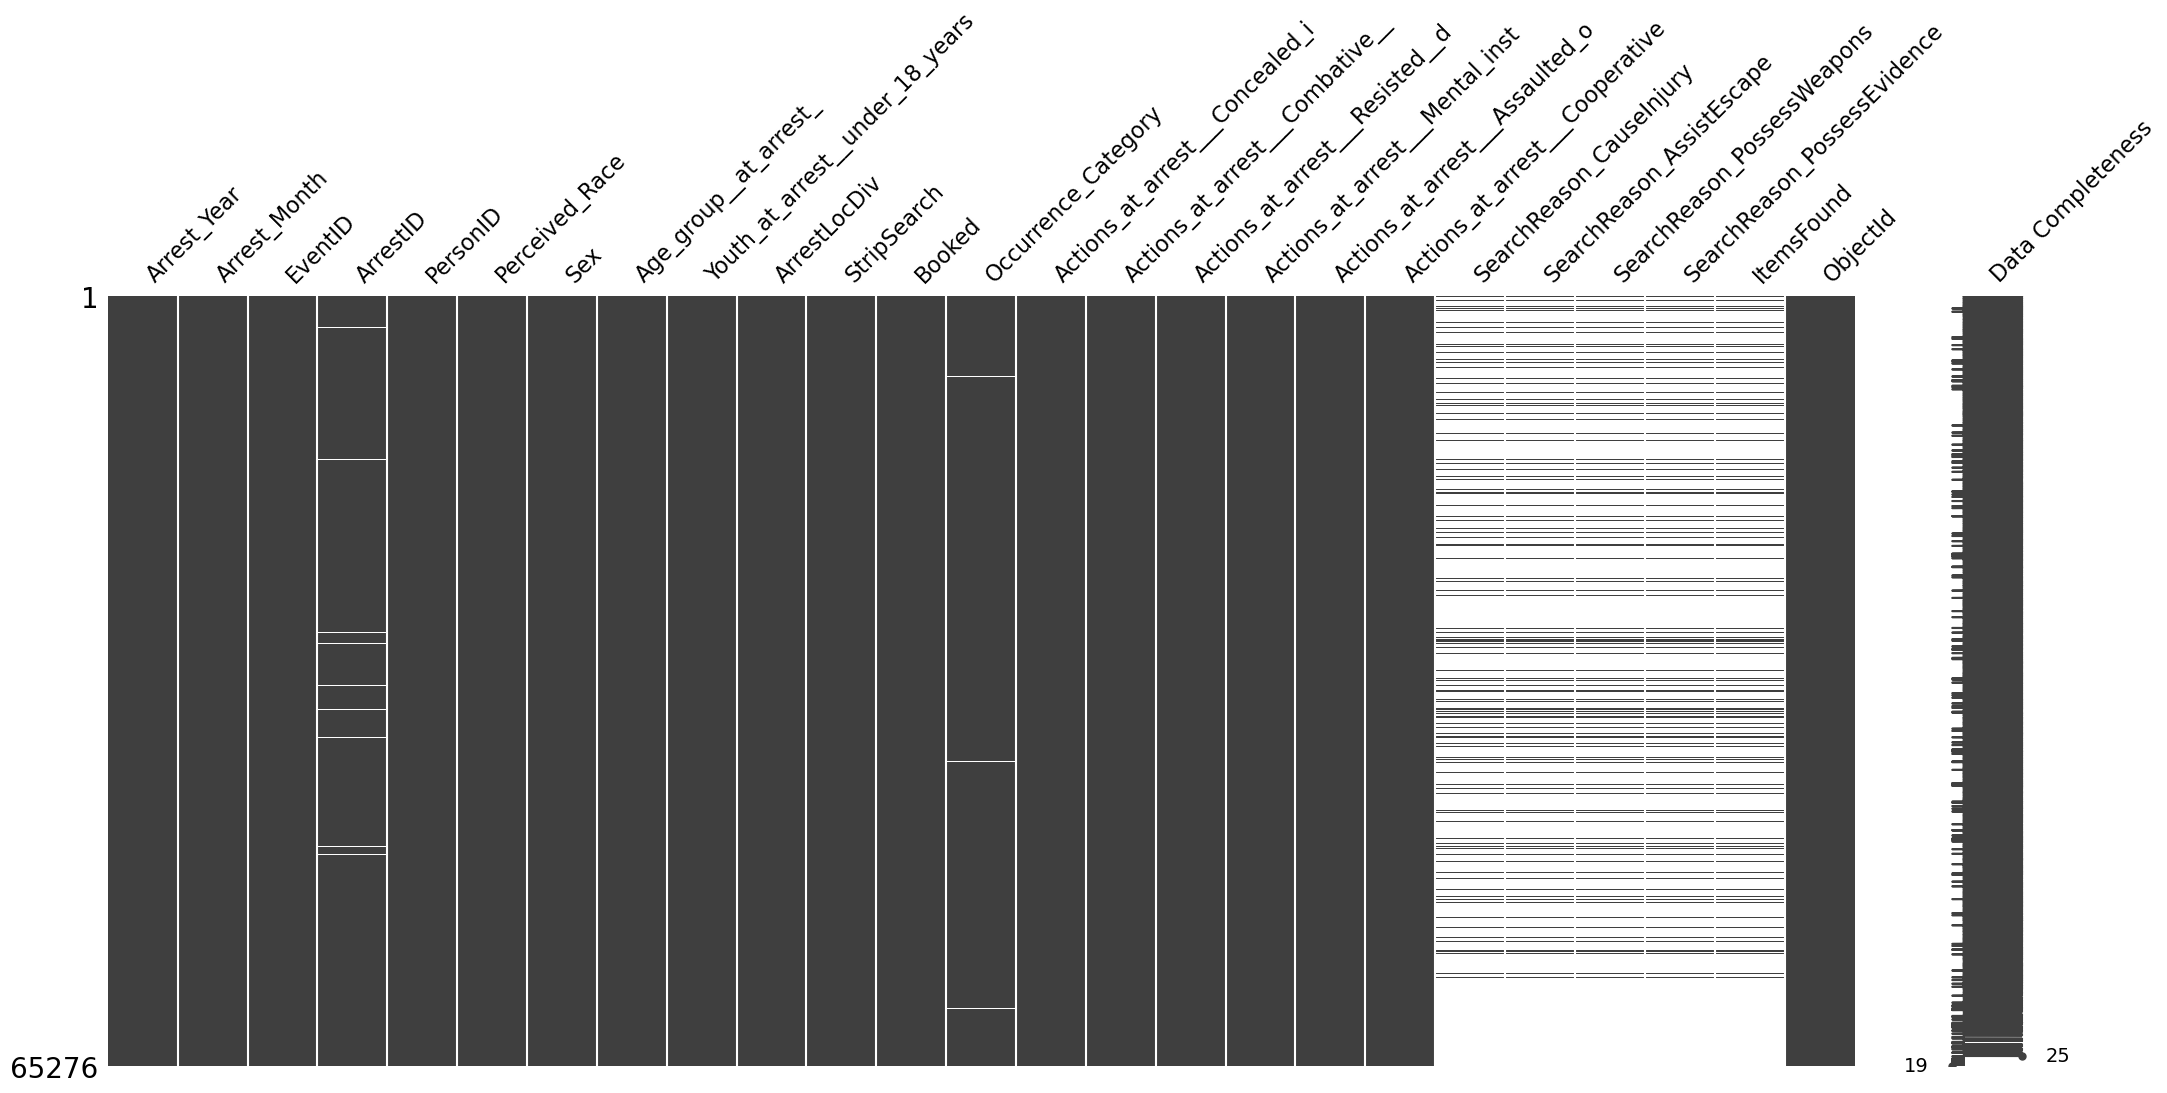

In [10]:
# Statistics of missing value for data
#Visualize Missing Vlaues(NaN) in dataframe
mso.matrix(data, labels=True) 
#Display the figures
plt.show()
# SearchReason_CauseInjury      
# SearchReason_AssistEscape        
# SearchReason_PossessWeapons      
# SearchReason_PossessEvidence    
# ItemsFound             
# Has many missing values

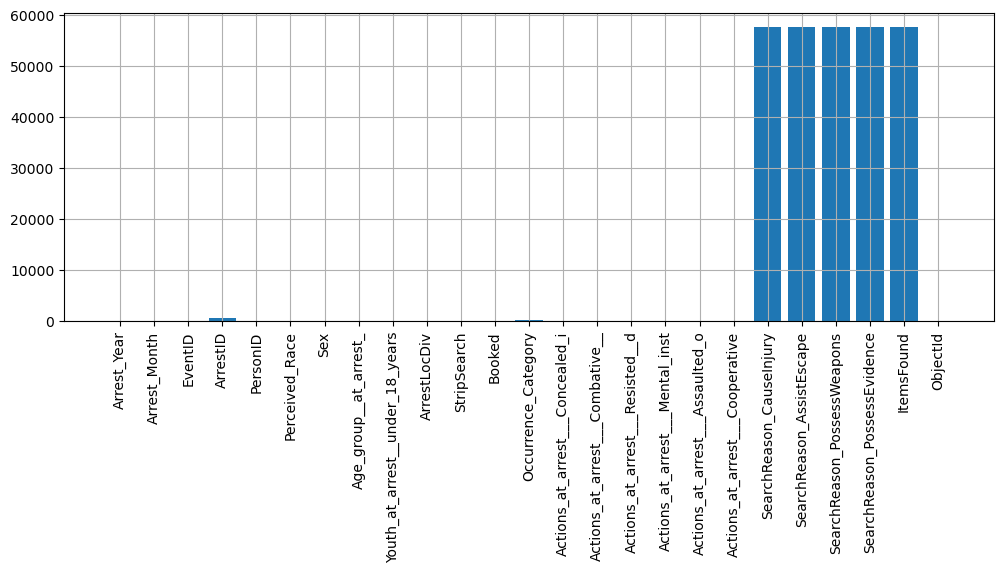

In [11]:
# More intuitive visualization of the number of missing values per column
# Visual Dislay of quantity of missing value per column
null = data.isnull().sum()
plt.figure(figsize=(12,4), dpi=100)
plt.bar(null.index, null)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [12]:
# Count the frequency of uqique values in the sex
counts = data['Sex'].value_counts()
counts

M    52650
F    12617
U        9
Name: Sex, dtype: int64

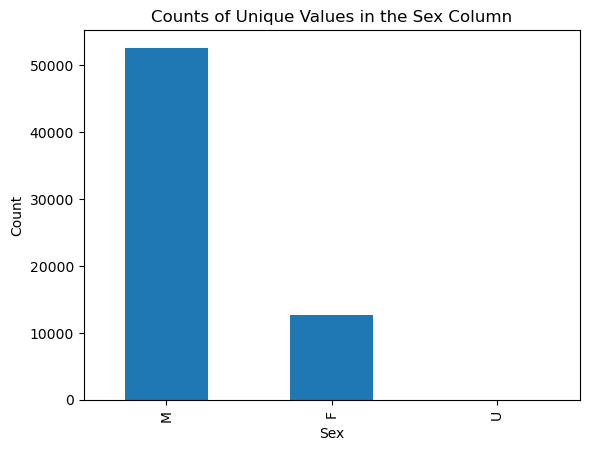

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of unique values in the 'Sex' column
counts = data['Sex'].value_counts()

# Create a bar chart of the counts
counts.plot.bar()

# Add labels for the x and y axes and a title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Unique Values in the Sex Column')
plt.show()

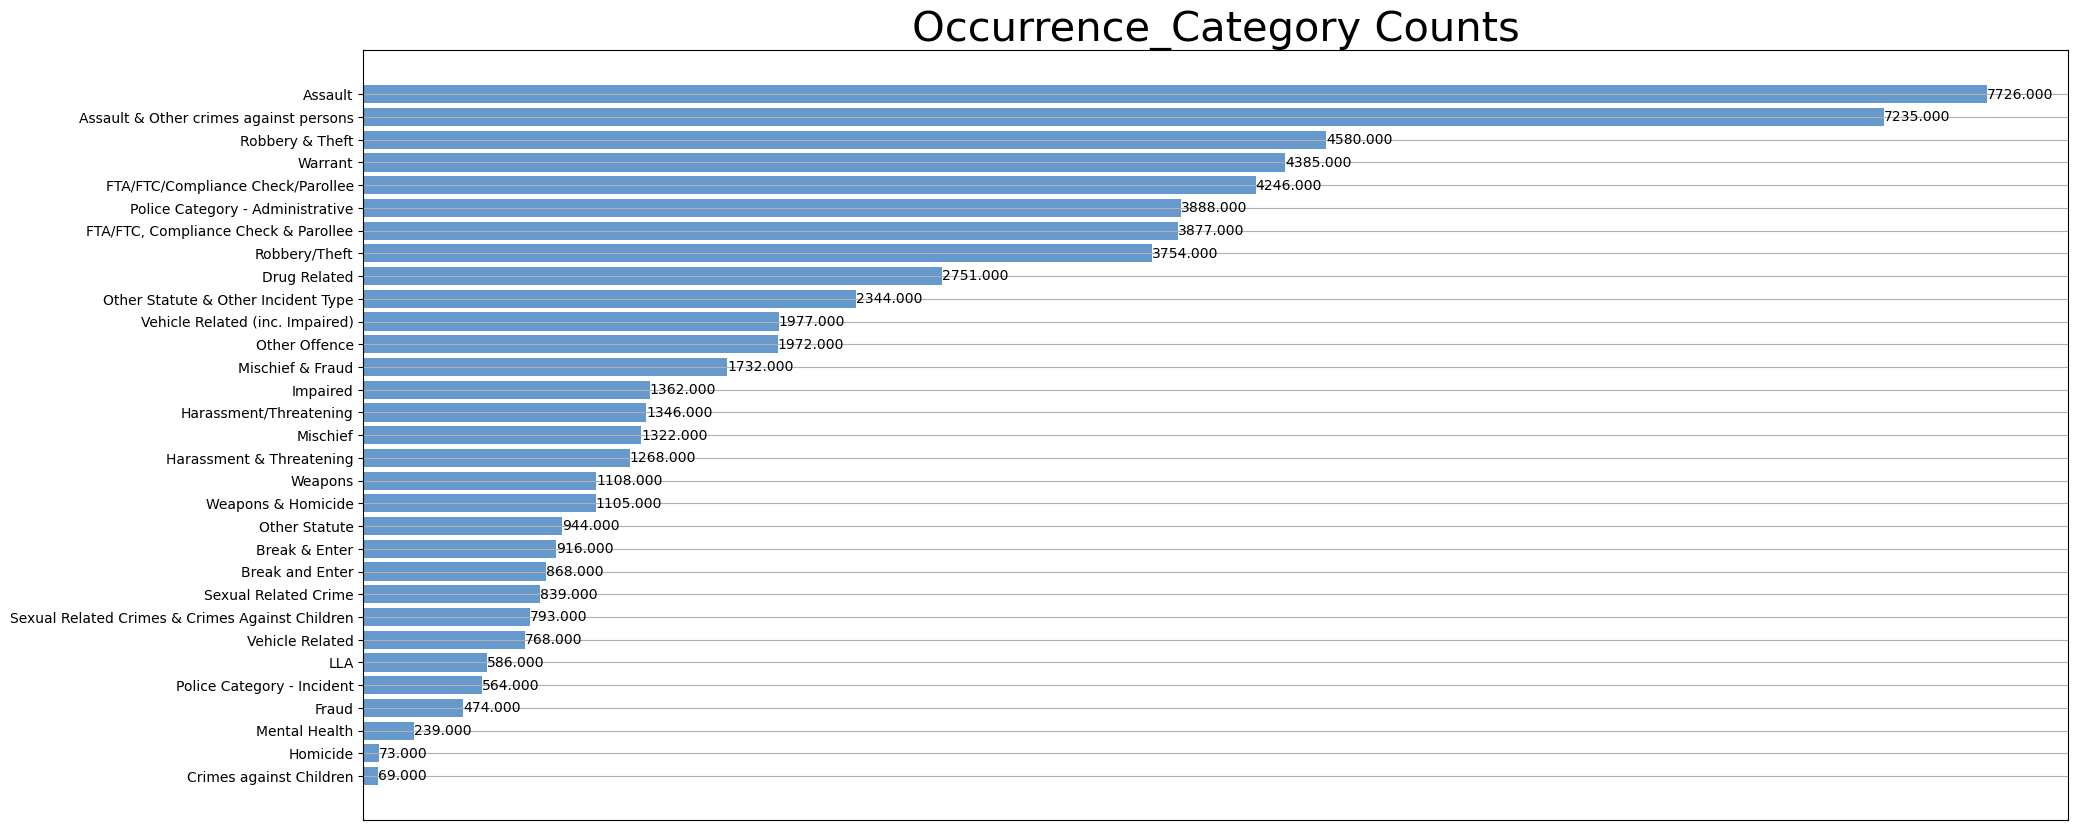

In [14]:
# Analysis of Occurrence_Category
# Count the frequency of unique values
mean_hp = data['Occurrence_Category'].value_counts(ascending=True)
city_name = list(mean_hp.index)
#Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(22,10))
b = ax.barh(range(len(city_name)), mean_hp, color='#6699CC')
 
#Add data labels to the right of horizontal bar chart
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%.3f' %
            round(w,3), ha='left', va='center',fontsize=10)
 
#Set the scale labe on the y axis
ax.set_yticks(range(len(city_name)))
ax.set_yticklabels(city_name,fontsize=10)
 
#Remove all the xticks from x-axis
plt.xticks(())
 
plt.title('Occurrence_Category Counts', loc='center', fontsize='30',
          fontweight='regular', color='black')
plt.grid()
plt.show()
# Assault Category occurs most for 7726 times

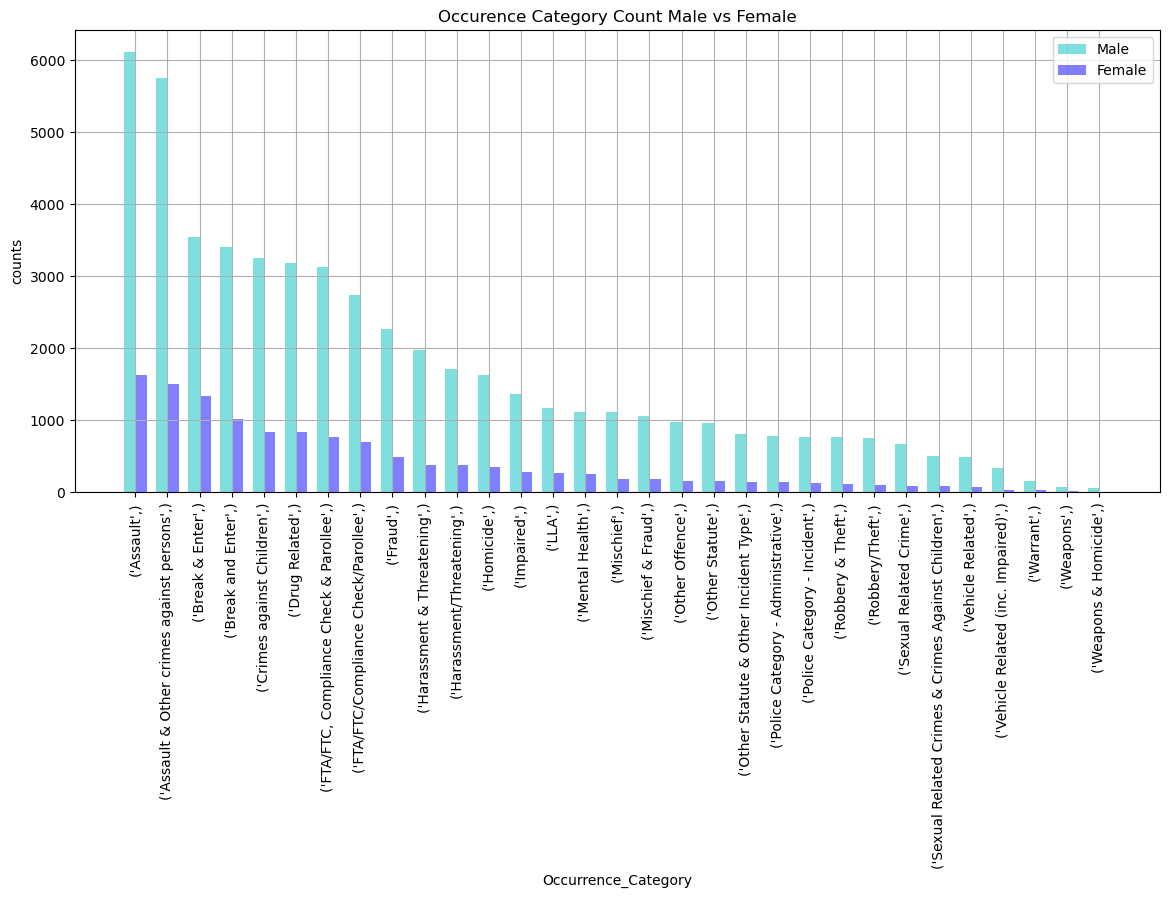

In [15]:
# Count the frequency of each Occurance Category in arrest and strips seraches between male and female
import numpy as np
plt.figure(figsize=(14,6), dpi=100)
# Count the frequency of each category in Occurence_Categoty column of the dataframe for the rows where Sex is qual to "M"
y = data.loc[data['Sex']=="M",['Occurrence_Category']].value_counts()
y1 = data.loc[data['Sex']=="F",['Occurrence_Category']].value_counts()
age_df=pd.concat([y,y1],axis=1)
age_df.columns=['M','F']

bar_width = 0.35
tick_label = y.sort_index().index

plt.bar(np.arange(len(y)), y, bar_width, align="center", color="c", label="Male", alpha=0.5)
plt.bar(np.arange(len(y1))+bar_width, y1, bar_width, color="b",  label="Female", alpha=0.5)

plt.xlabel("Occurrence_Category")
plt.ylabel("counts")
plt.title("Occurence Category Count Male vs Female")

plt.xticks(np.arange(len(y))+bar_width/2, tick_label)
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()
#Through the below bar chart, we can see there is no such big differnce in the porportion of each Occurence Category between Male and Female.

In [16]:
# Counting the number of occurences of each arrested age group in the 'Age_group__at_arrest_' column
age = data['Age_group__at_arrest_'].value_counts()

In [17]:
bar = (
    Bar(init_opts=opts.InitOpts(width="700px", height='300px'))
    .add_xaxis(list(age.index))
    .add_yaxis("Age Group", list(age))
    .set_global_opts(title_opts=opts.TitleOpts(title="Age_group__at_arrest_",subtitle="unit：person"))
)
bar.render_notebook()
# The aged group 25 to 34 years been arrested most for 20949 times

In [18]:
# Analysis ffor Actions at arrest (what actions people took when they are arrested)
actions = ['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__',
           'Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst',
           'Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']
action = list(map(lambda x:x.split("___")[-1], actions))
action

['Concealed_i',
 'Combative__',
 'Resisted__d',
 'Mental_inst',
 'Assaulted_o',
 'Cooperative']

In [19]:
ac = data[actions]
ac.sum()

Actions_at_arrest___Concealed_i      266
Actions_at_arrest___Combative__     2881
Actions_at_arrest___Resisted__d     2502
Actions_at_arrest___Mental_inst     2179
Actions_at_arrest___Assaulted_o      415
Actions_at_arrest___Cooperative    29109
dtype: int64

In [20]:
from pyecharts import options as opts
from pyecharts.charts import Funnel

v = [266, 2881, 2502, 2179, 415, 29109]
phase = ['Concealed', 'Combative', 'Resisted', 'Mental', 'Assaulted', 'Cooperative']
c = (
    Funnel(init_opts=opts.InitOpts(width="600px", height='300px'))
    .add("Actions_at_arrest", [list(z) for z in zip(phase, v)])
    .set_global_opts(title_opts=opts.TitleOpts(title="")) 
)
c.render_notebook()
# People concealed least when they are arrested

In [21]:
# Visualization for counting each Searchreason
s = data[[
      'SearchReason_CauseInjury','SearchReason_AssistEscape',
      'SearchReason_PossessWeapons','SearchReason_PossessEvidence']]
s1 = s.sum()
s1

SearchReason_CauseInjury        5973.0
SearchReason_AssistEscape       2677.0
SearchReason_PossessWeapons     3537.0
SearchReason_PossessEvidence    3268.0
dtype: float64

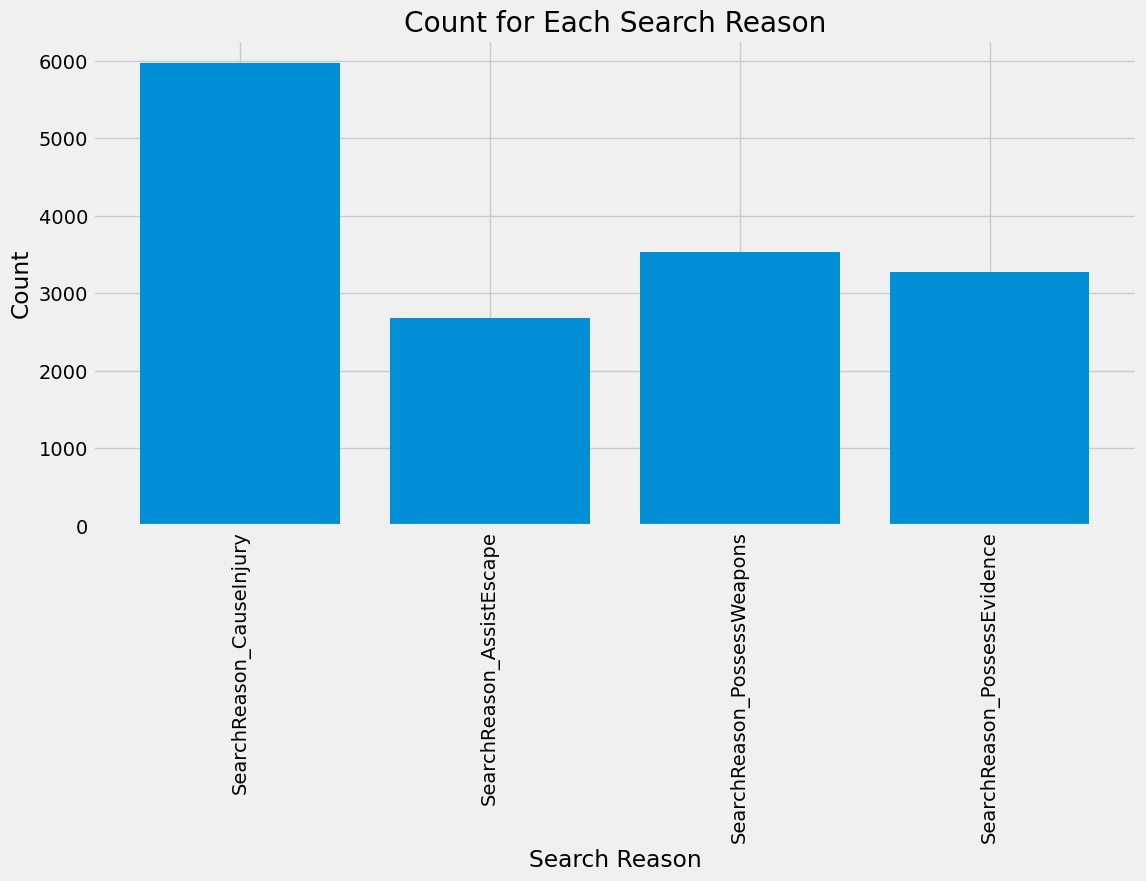

In [22]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 28, 18
plt.figure(figsize=(12,6), dpi=100)
plt.bar(s1.index, s1)
plt.xticks(rotation=90)
plt.xlabel("Search Reason")
plt.ylabel("Count")
plt.title("Count for Each Search Reason")
plt.show()

In [23]:
#Extract the values in the 'Age_group__at_arrest_' column of the dataset
data['Age_group__at_arrest_']

0            Aged 35 to 44 years
1            Aged 35 to 44 years
2            Aged 35 to 44 years
3            Aged 25 to 34 years
4            Aged 25 to 34 years
                  ...           
65271        Aged 25 to 34 years
65272        Aged 35 to 44 years
65273        Aged 45 to 54 years
65274    Aged 17 years and under
65275        Aged 18 to 24 years
Name: Age_group__at_arrest_, Length: 65276, dtype: object

In [24]:
# Counts of each age group in the "Age_group__at_arrest_" column for the year 2020
y = data.loc[data['Arrest_Year']==2020,'Age_group__at_arrest_'].value_counts().sort_index()
# Counts of each age group in the "Age_group__at_arrest_" column for the year 2021
y1 = data.loc[data['Arrest_Year']==2021,'Age_group__at_arrest_'].value_counts().sort_index()

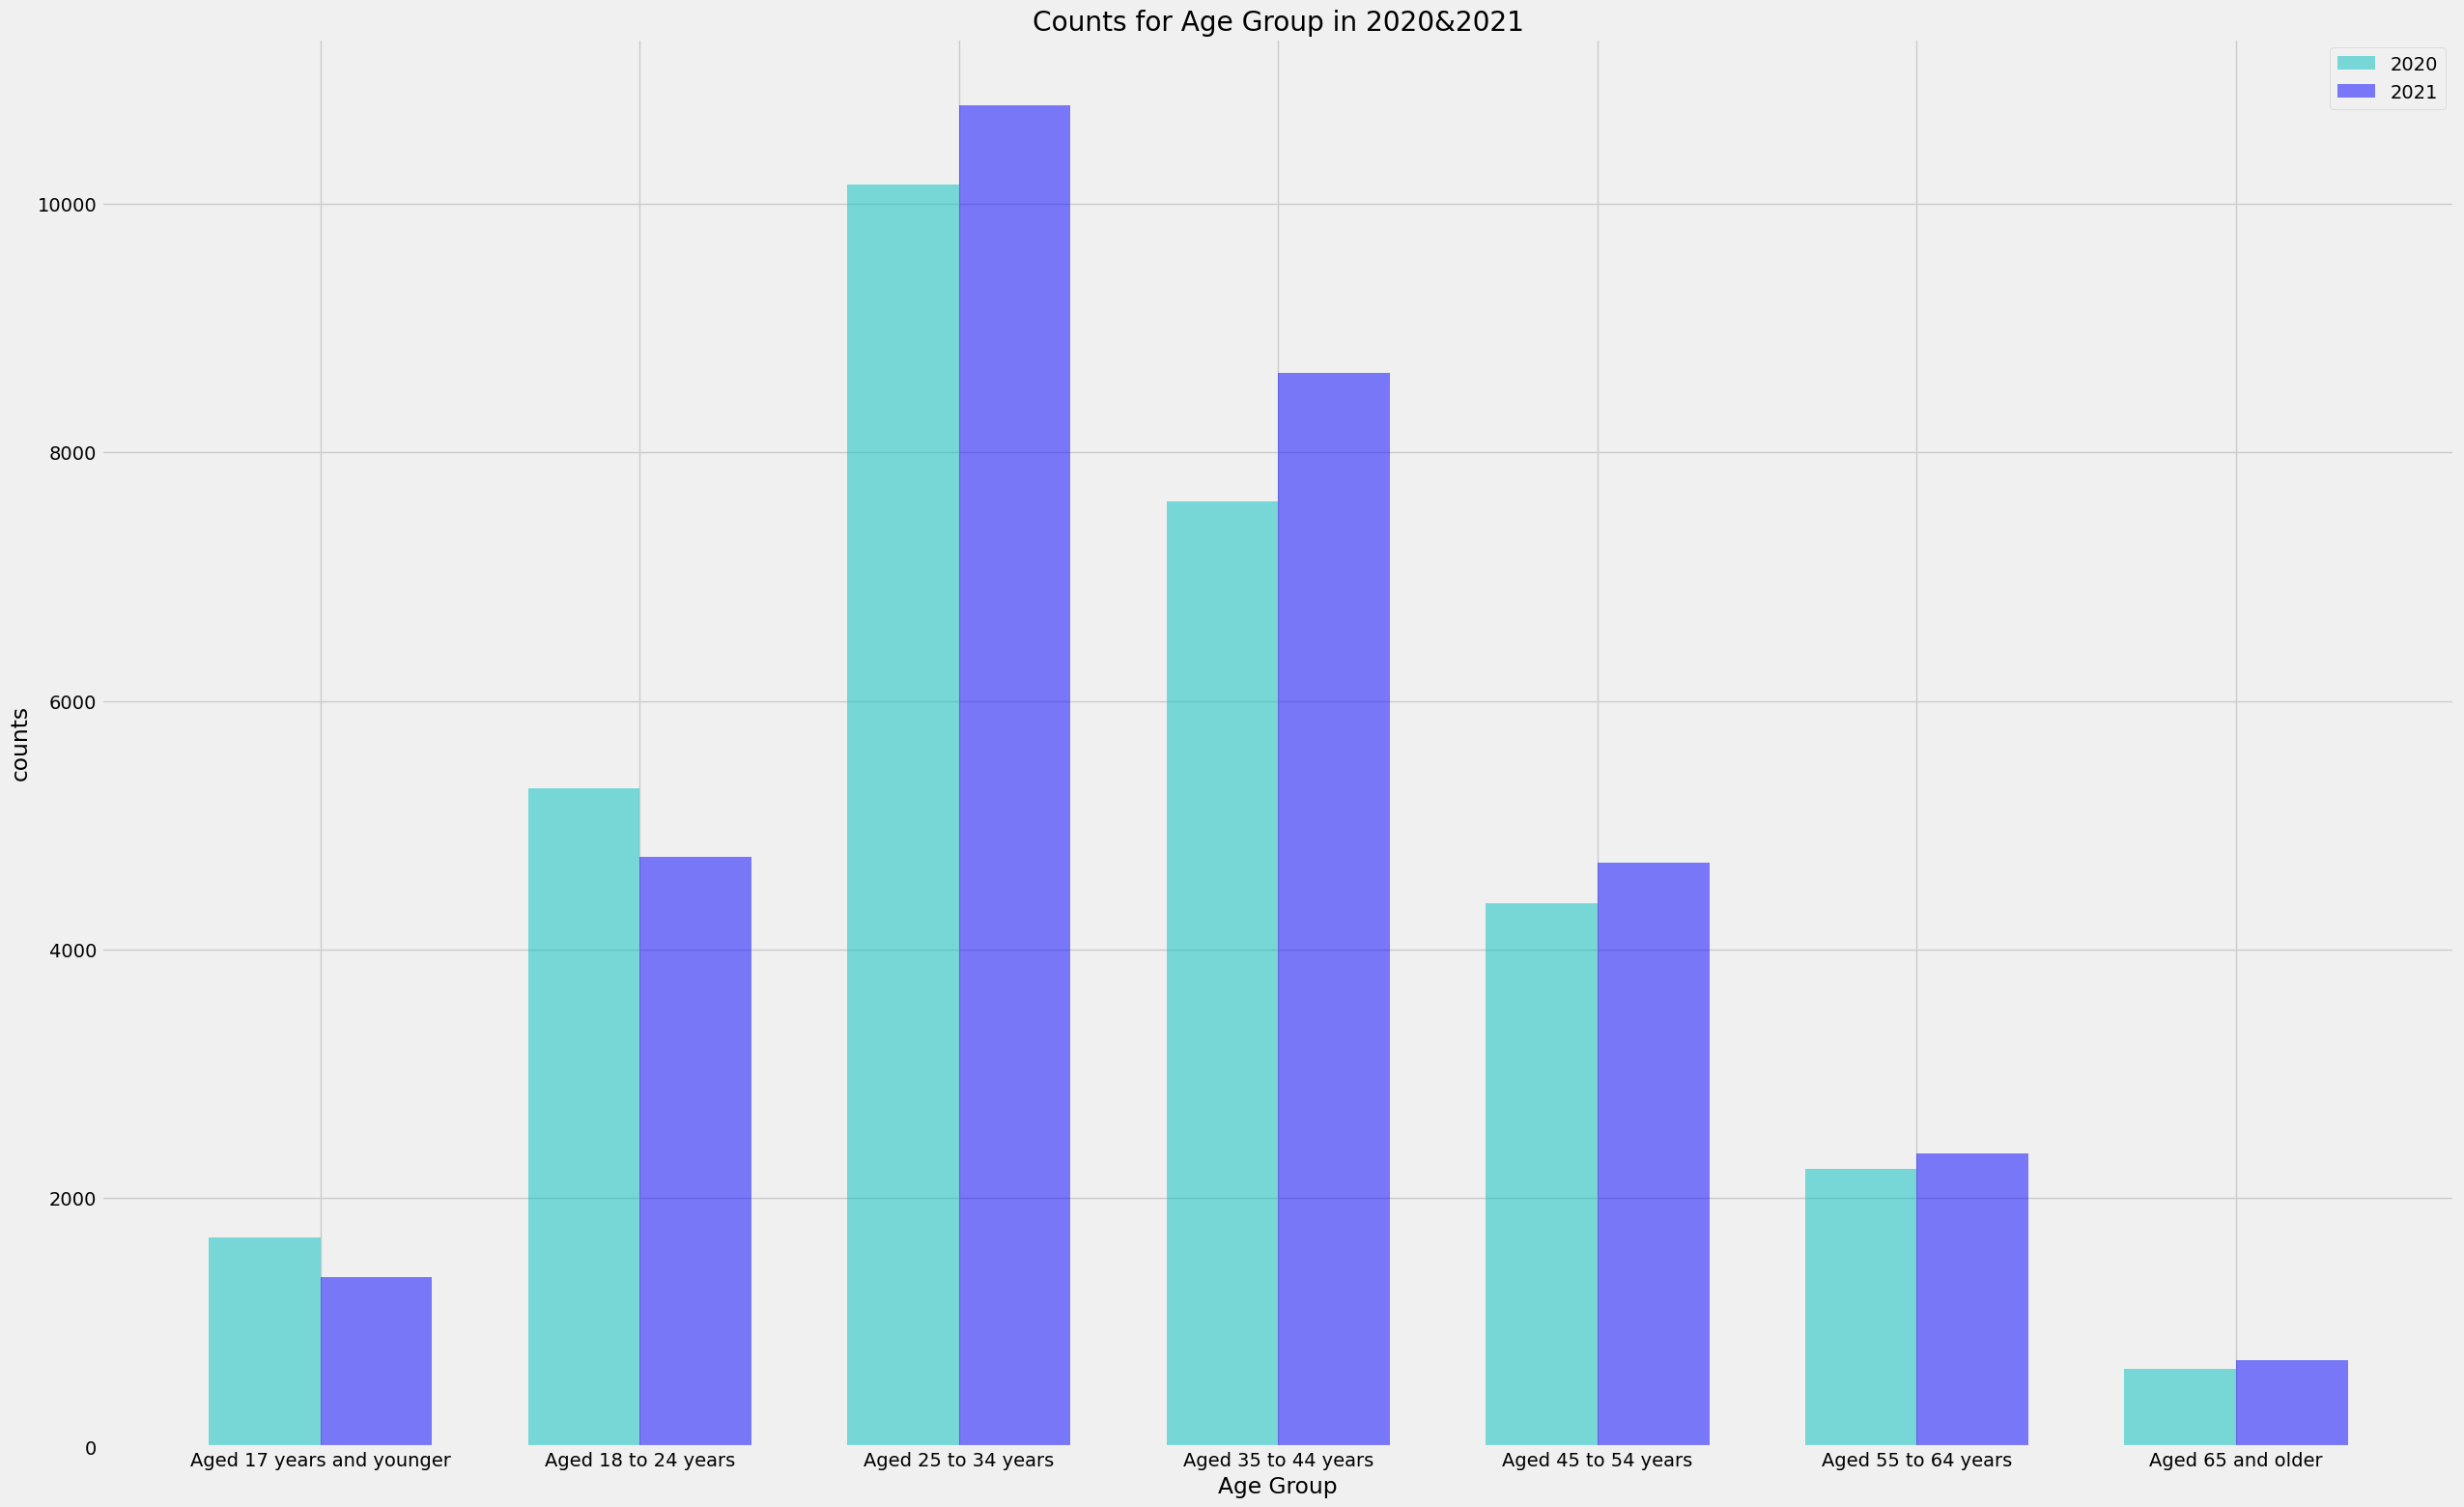

In [25]:
# Visualize the distribution of counting of each arresred age group in 2020 and 2021
bar_width = 0.35
tick_label = y.sort_index().index

plt.bar(np.arange(len(y)), y, bar_width, align="center", color="c", label="2020", alpha=0.5)
plt.bar(np.arange(len(y1))+bar_width, y1, bar_width, color="b", align="center", label="2021", alpha=0.5)

plt.xlabel("Age Group")
plt.ylabel("counts")
plt.title("Counts for Age Group in 2020&2021")
plt.xticks(np.arange(len(y))+bar_width/2, tick_label)

plt.legend()

plt.show()
# The number arrested younger age(<25) group decrased in 2021, but the number of arrested ager group above 25 increased

In [26]:
# Calculating the correlation coefficients between all pairs of numerical columns in the data
data.corr()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
Arrest_Year,1.000000,0.004851,0.000195,-0.002922,-0.311121,-0.029617,-0.008026,-0.003071,0.006184,-0.006909,-0.001037,-0.017286,-0.152009,-0.198695,-0.093682,0.069375,-0.188101,0.060833
EventID,0.004851,1.000000,0.001086,-0.000564,0.004515,0.003574,-0.008544,-0.003417,-0.001590,-0.000763,0.009480,0.002531,-0.017701,-0.002027,-0.007137,0.021897,0.003697,-0.000895
ArrestID,0.000195,0.001086,1.000000,-0.005475,0.003754,0.001884,-0.002743,-0.003507,0.000784,-0.000837,-0.001380,0.001771,0.016809,0.004064,-0.000296,-0.013157,-0.004456,-0.002456
PersonID,-0.002922,-0.000564,-0.005475,1.000000,0.001818,-0.003154,-0.000765,-0.000350,0.003432,0.000238,0.001720,0.000293,-0.005192,-0.002699,0.006726,-0.022030,0.002075,0.002499
StripSearch,-0.311121,0.004515,0.003754,0.001818,1.000000,0.300246,0.060945,0.075347,0.047473,0.087442,0.036486,-0.018694,NaN,NaN,NaN,NaN,NaN,-0.080781
Booked,-0.029617,0.003574,0.001884,-0.003154,0.300246,1.000000,0.036971,0.115742,0.064555,0.096957,0.049537,0.055384,-0.004686,-0.024561,0.014172,0.011585,0.017739,-0.062287
Actions_at_arrest___Concealed_i,-0.008026,-0.008544,-0.002743,-0.000765,0.060945,0.036971,1.000000,0.047136,0.047351,0.037646,0.022113,-0.019167,-0.020898,-0.018271,0.019982,0.048159,0.014269,-0.006164
Actions_at_arrest___Combative__,-0.003071,-0.003417,-0.003507,-0.000350,0.075347,0.115742,0.047136,1.000000,0.249629,0.227052,0.245566,-0.180322,-0.001651,0.013853,0.015889,-0.057889,0.004948,-0.016323
Actions_at_arrest___Resisted__d,0.006184,-0.001590,0.000784,0.003432,0.047473,0.064555,0.047351,0.249629,1.000000,0.116152,0.101491,-0.162412,0.022770,0.035726,0.022166,-0.015080,-0.003918,-0.015673
Actions_at_arrest___Mental_inst,-0.006909,-0.000763,-0.000837,0.000238,0.087442,0.096957,0.037646,0.227052,0.116152,1.000000,0.079560,-0.072867,-0.056003,-0.025974,0.002071,-0.065115,0.029720,-0.017431


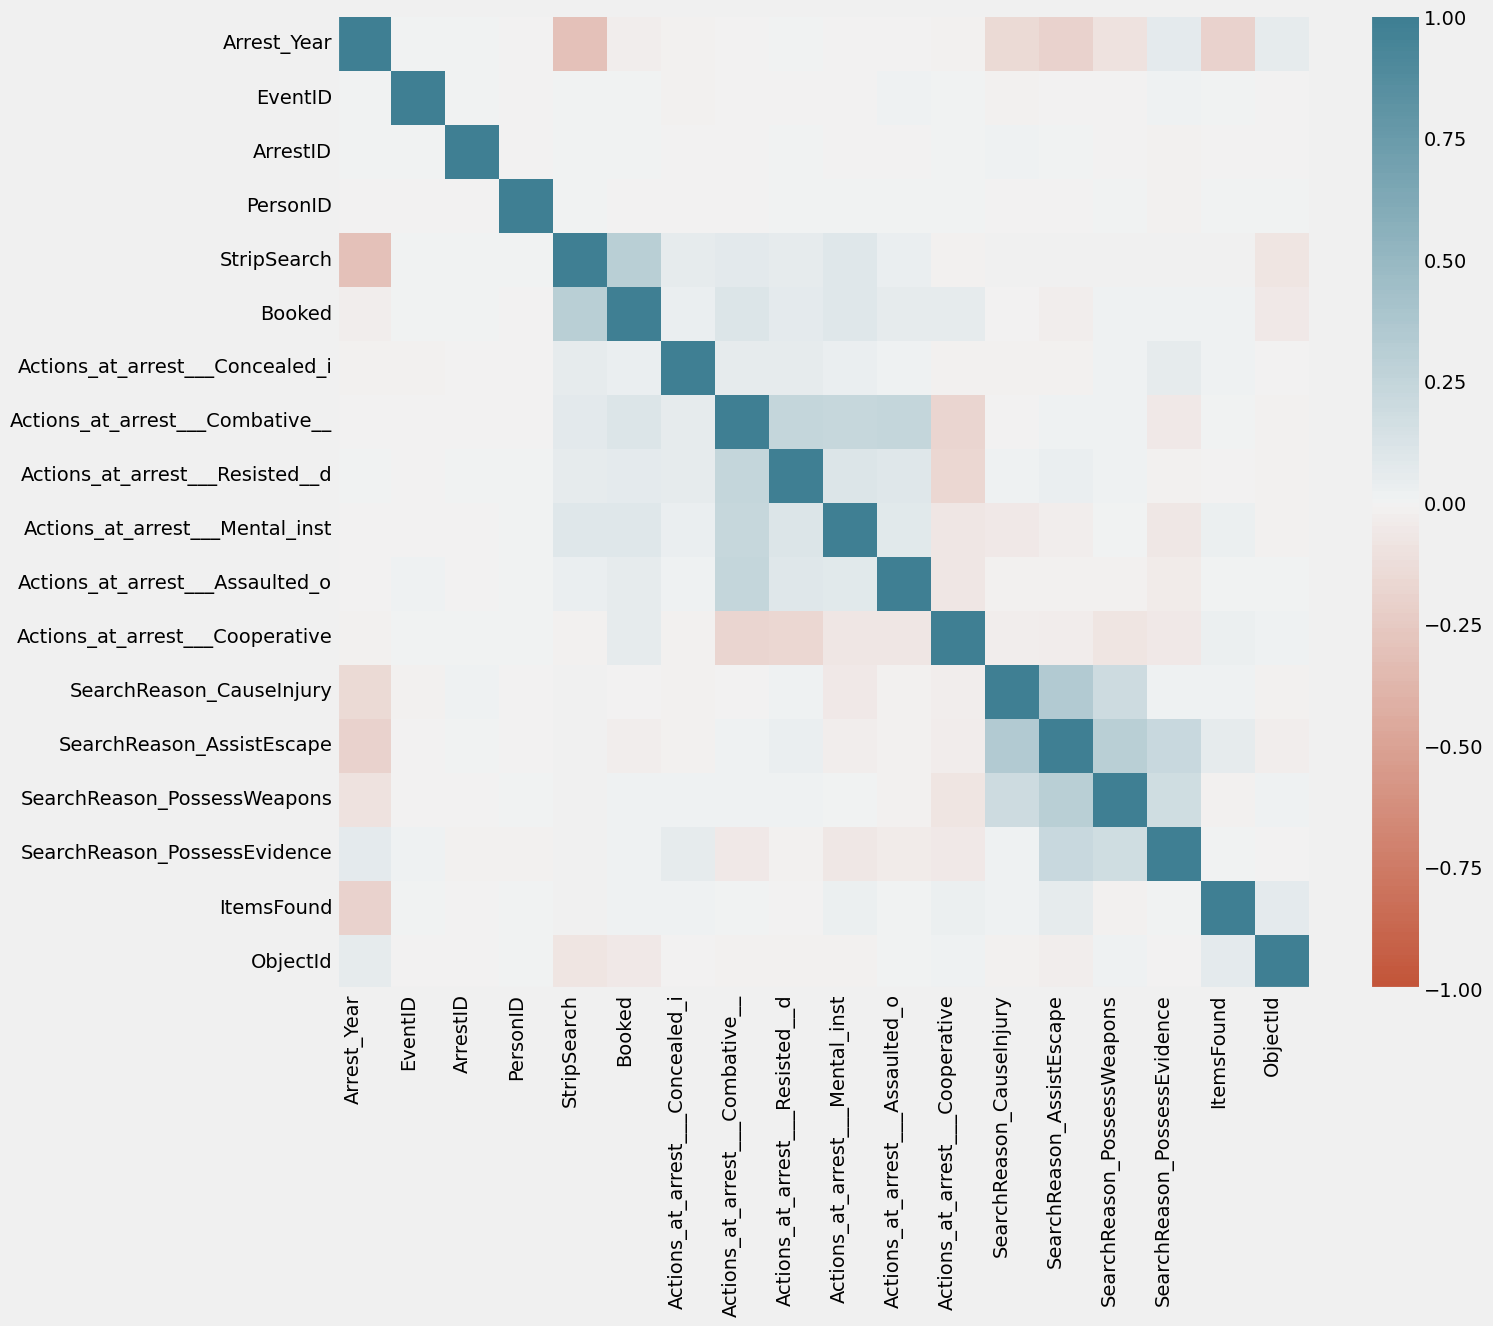

In [27]:
corr = data.corr()
plt.figure(figsize=(14, 12), dpi=100)
ax=sns.heatmap(
    corr,
    annot=False,
    vmin = -1,vmax = 1, center = 0 ,square= True,
    cmap = sns.diverging_palette(20,220,n=200)
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right'
)
sns.despine()
plt.savefig("corr.png")
plt.show()
# StripSearch seems has a strong correlation with Arrest_Year

# Method for Statistical Test

## Research Q1

### T test-1

In [28]:
# Extract subsets from the 'Occurrence_Category' column for all rows where the 'Sex' in column is M
male1 = data.loc[data['Sex']=='M',:]['Occurrence_Category']
# Extract subsets from the 'Occurrence_Category' column for all rows where the 'Sex' in column is F
female1= data.loc[data['Sex']=='F',:]['Occurrence_Category']
# Computes the frequency count of unique values in the "male1" subset and stores the result in the "c_m1" variable
c_m1 = male1.value_counts()
# Computes the frequency count of unique values in the "female1" subset pass the unique values found in "male1" and store in "c_fm1" variable
c_fm1 = female1.value_counts()[c_m1.index]  
c_m1

Assault                                            6107
Assault & Other crimes against persons             5741
Warrant                                            3547
FTA/FTC/Compliance Check/Parollee                  3408
Robbery & Theft                                    3252
FTA/FTC, Compliance Check & Parollee               3177
Police Category - Administrative                   3122
Robbery/Theft                                      2735
Drug Related                                       2257
Other Statute & Other Incident Type                1970
Vehicle Related (inc. Impaired)                    1702
Other Offence                                      1625
Mischief & Fraud                                   1355
Harassment/Threatening                             1164
Harassment & Threatening                           1110
Impaired                                           1107
Mischief                                           1056
Weapons & Homicide                              

In [29]:
c_fm1

Assault                                            1619
Assault & Other crimes against persons             1494
Warrant                                             837
FTA/FTC/Compliance Check/Parollee                   836
Robbery & Theft                                    1327
FTA/FTC, Compliance Check & Parollee                699
Police Category - Administrative                    766
Robbery/Theft                                      1018
Drug Related                                        494
Other Statute & Other Incident Type                 373
Vehicle Related (inc. Impaired)                     275
Other Offence                                       347
Mischief & Fraud                                    377
Harassment/Threatening                              182
Harassment & Threatening                            158
Impaired                                            255
Mischief                                            266
Weapons & Homicide                              

In [30]:
from scipy import stats
import numpy as np
# Two-sample T-test
sample1=c_m1.values
sample2=c_fm1.values
print("MALE Occurrence_Category Mean:", np.mean(sample1))
print("FEMALE Occurrence_Category Mean:", np.mean(sample2))
sample1 = np.asarray(sample1)
sample2 = np.asarray(sample2)
r = stats.ttest_ind(sample1, sample2)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

MALE Occurrence_Category Mean: 1694.1290322580646
FEMALE Occurrence_Category Mean: 405.93548387096774
statistic: 4.486161111404614
pvalue: 3.3387022490314336e-05


In [31]:
# H0 (Null Hypothesis): The population means of two independent groups, male and female, who are arrested or striped (based on different occurrence categories), are equal. 
# HA (Alternative Hypothesis): The population means of two independent groups, male and female, who are arrested or striped (based on different occurrence categories), are not equal. 
r1 = pd.DataFrame([r.__getattribute__("statistic"),
                   r.__getattribute__("pvalue"),'reject H0 as p-value is smaller than 0.005']).T
r1.columns=['Statistic','P-value','detail']
r1.index = ['T-test on Sex']
r1

,Statistic,P-value,detail
T-test on Sex,4.486161,0.000033,reject H0 as p-value is smaller than 0.005


### One way ANOVA Test -1

In [32]:
# Using One-way ANOVA to test if there are any difference between the population mean two indepdent groups, male and female
from scipy import stats
args = []
args.append(sample1.tolist())
args.append(sample2.tolist())
 
f, p = stats.f_oneway(*args)
print(f, p) 
 
if p < 0.005:
    print('p < 0.005')  

20.12564151747908 3.3387022490314275e-05
p < 0.005


In [33]:
# H0 (Null Hypothesis): The population means of two independent groups, male and female, who are arrested or striped (based on different occurrence categories), are equal. 
r1 = pd.DataFrame([f,p,'reject H0 as p-value is smaller than 0.005']).T
r1.columns=['Statistic','P-value','detail']
r1.index = ['ANOVA test on Sex']
r1

,Statistic,P-value,detail
ANOVA test on Sex,20.125642,0.000033,reject H0 as p-value is smaller than 0.005


Since the P value is < 0.05, we can reject the null hypothesis and consider the two groups mean of male and female, who are arrested or striped (based on different occurrence categories) are significantly different.

## Research Q2

In [34]:
# The age of group people who are arrested 
data['Age_group__at_arrest_']

0            Aged 35 to 44 years
1            Aged 35 to 44 years
2            Aged 35 to 44 years
3            Aged 25 to 34 years
4            Aged 25 to 34 years
                  ...           
65271        Aged 25 to 34 years
65272        Aged 35 to 44 years
65273        Aged 45 to 54 years
65274    Aged 17 years and under
65275        Aged 18 to 24 years
Name: Age_group__at_arrest_, Length: 65276, dtype: object

In [35]:
# Diaplay the sum of the values in the Actions_at_arrest column for each Age_group_at_arrest.
r = data.groupby(by=['Age_group__at_arrest_']).sum()[actions]
r

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
Age_group__at_arrest_,,,,,,
Aged 17 years and under,10,38,51,7,8,621
Aged 17 years and younger,13,29,44,9,3,795
Aged 18 to 24 years,66,391,413,291,89,4418
Aged 25 to 34 years,89,1021,883,811,155,9133
Aged 35 to 44 years,47,799,633,609,95,7215
Aged 45 to 54 years,28,383,305,306,33,4186
Aged 55 to 64 years,11,183,139,116,24,2089
Aged 65 and older,1,20,14,10,1,310
Aged 65 years and older,1,16,18,19,7,335


In [36]:
# Using the NumPy library to convert the pandas dataframe 'r' to a Python list
lst = np.array(r).tolist()
lst

[[10, 38, 51, 7, 8, 621],
 [13, 29, 44, 9, 3, 795],
 [66, 391, 413, 291, 89, 4418],
 [89, 1021, 883, 811, 155, 9133],
 [47, 799, 633, 609, 95, 7215],
 [28, 383, 305, 306, 33, 4186],
 [11, 183, 139, 116, 24, 2089],
 [1, 20, 14, 10, 1, 310],
 [1, 16, 18, 19, 7, 335]]

### T test-2

In [37]:
import numpy as np
from scipy.stats import ttest_ind

# Calculate the t-test between two groups, e.g. 'Aged 25 to 34 years' and '35 to 44 years'
group1 = lst[3]  # Aged 25 to 34 years
group2 = lst[4]  # Aged 35 to 44 years
t_stat, p_value = ttest_ind(group1, group2)

# Calculate the standard deviation for each group
std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

# Calculate the mean difference and the standard error
mean_1 = np.mean(group1)
mean_2 = np.mean(group2)
mean_diff = np.mean(group1) - np.mean(group2)
std_error = np.sqrt((std1**2 / len(group1)) + (std2**2 / len(group2)))

# Calculate the confidence interval (CI) for the mean difference
alpha = 0.05  # significance level
df = len(group1) + len(group2) - 2  # degrees of freedom
t_crit = abs(ttest_ind(group1, group2)[0])  # critical t-value
margin_error = t_crit * std_error  # margin of error
CI = mean_diff + np.array([-1, 1]) * margin_error

# Print the results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean of group 1: {mean_1}")
print(f"Mean of group 2: {mean_2}")
print(f"Standard deviation of group 1: {std1}")
print(f"Standard deviation of group 2: {std2}")
print(f"Mean difference: {mean_diff}")
print(f"Standard error: {std_error}")
print(f"Confidence interval (CI): {CI}")
print(f"Degree Freedom: {df}")

T-test statistic: 0.2455457727474735
P-value: 0.8109998147626681
Mean of group 1: 2015.3333333333333
Mean of group 2: 1566.3333333333333
Standard deviation of group 1: 3508.677110631109
Standard deviation of group 2: 2784.1346710722646
Mean difference: 449.0
Standard error: 1828.579637010346
Confidence interval (CI): [  0. 898.]
Degree Freedom: 10


### One-way ANOVA -2

In [38]:
import numpy as np
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(*lst)

# Perform a one-way ANOVA on the sums of 'Actions_at_arrest' for all age groups
f_stat, p_value = f_oneway(*lst)

# Print the results
print(f"One-way ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

One-way ANOVA F-statistic: 1.0430351351240472
P-value: 0.41906157514142856


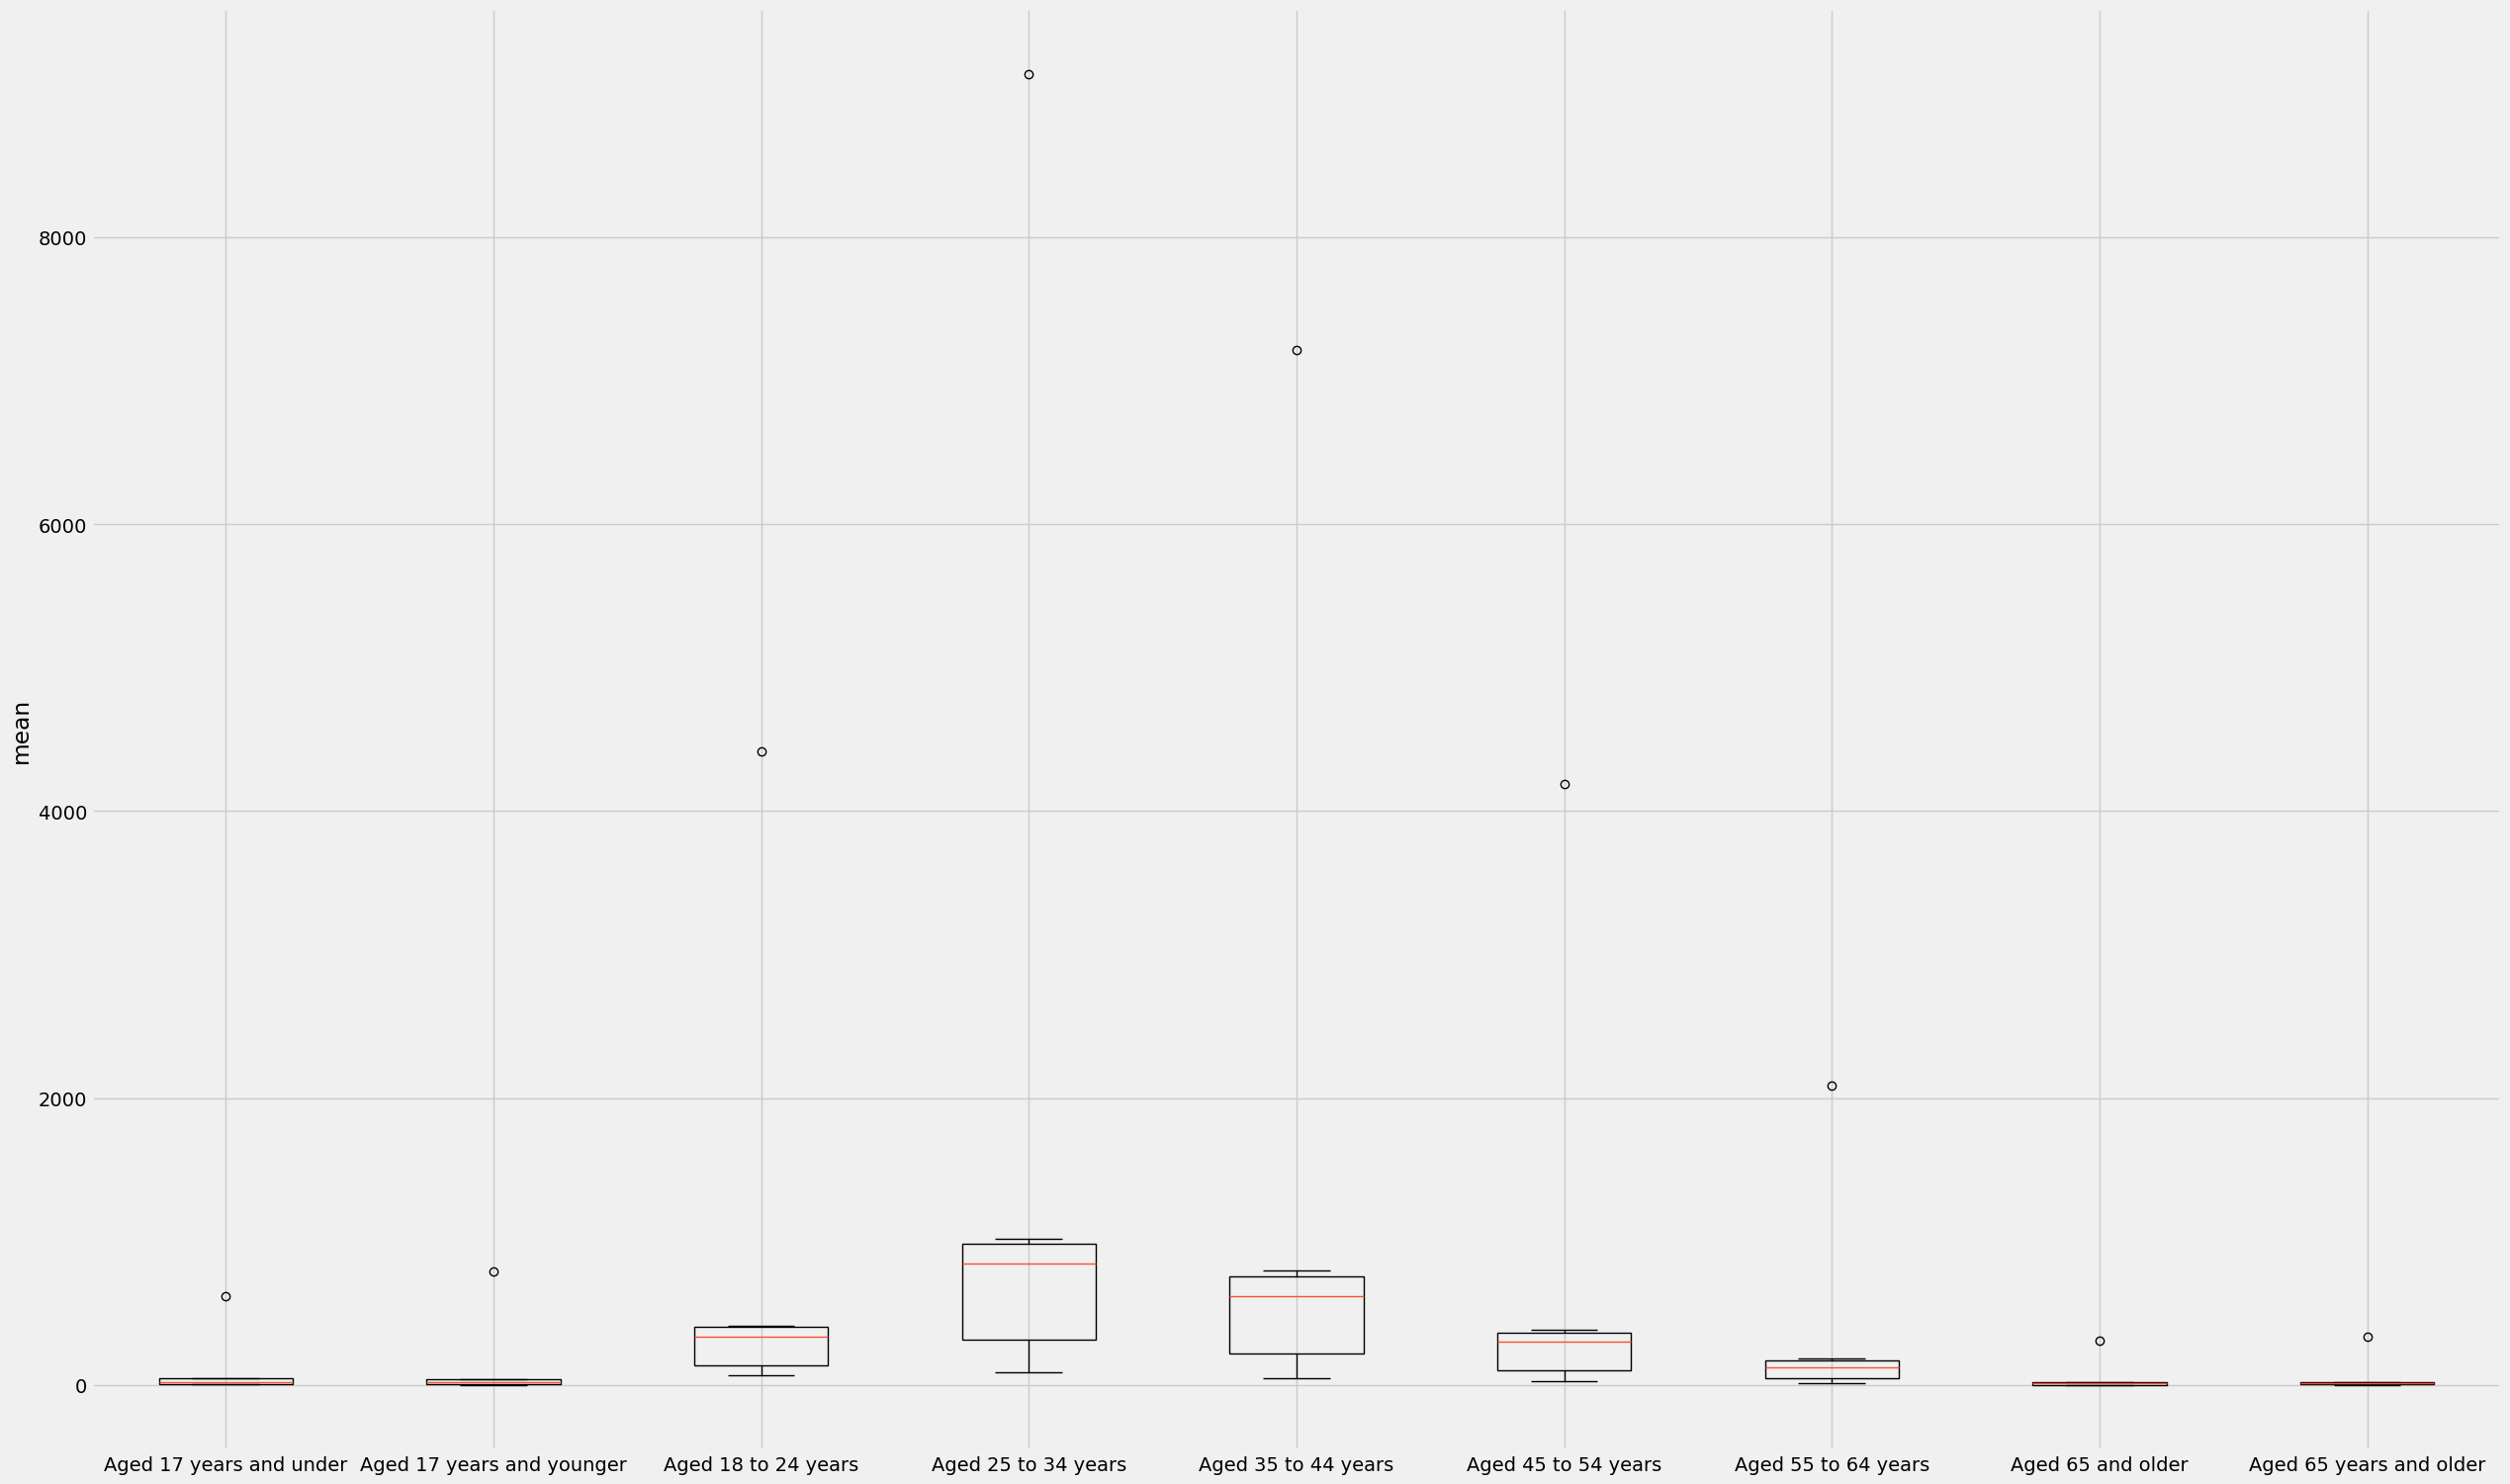

In [39]:
from scipy import stats
import numpy as np
from scipy.stats import tukey_hsd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
# Creates a box-and-whisker plot for each column of the 'r' dataframe (i.e., each age group). The '.T 'attribute transposes the dataframe so that the age groups are displayed horizontally.
ax.boxplot(r.T)
ax.set_xticklabels(r.index) 
ax.set_ylabel("mean") 
plt.show()

From the box and whisker plot, we can see overlap in the interquartile ranges group 1 to group 2 to group 3...(every group), but we can apply the tukey_hsd test to determine if the difference between means is significant. We set a significance level of .05 to reject the null hypothesis.

In [40]:
res = tukey_hsd(lst[0], lst[1], lst[2], lst[3], lst[4], lst[5],
               lst[6], lst[7], lst[8])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -26.333     1.000 -3252.893  3200.227
 (0 - 2)   -822.167     0.995 -4048.727  2404.393
 (0 - 3)  -1892.833     0.610 -5119.393  1333.727
 (0 - 4)  -1443.833     0.869 -4670.393  1782.727
 (0 - 5)   -751.000     0.997 -3977.560  2475.560
 (0 - 6)   -304.500     1.000 -3531.060  2922.060
 (0 - 7)     63.167     1.000 -3163.393  3289.727
 (0 - 8)     56.500     1.000 -3170.060  3283.060
 (1 - 0)     26.333     1.000 -3200.227  3252.893
 (1 - 2)   -795.833     0.996 -4022.393  2430.727
 (1 - 3)  -1866.500     0.628 -5093.060  1360.060
 (1 - 4)  -1417.500     0.880 -4644.060  1809.060
 (1 - 5)   -724.667     0.998 -3951.227  2501.893
 (1 - 6)   -278.167     1.000 -3504.727  2948.393
 (1 - 7)     89.500     1.000 -3137.060  3316.060
 (1 - 8)     82.833     1.000 -3143.727  3309.393
 (2 - 0)    822.167     0.995 -2404.393  4048.727
 (2 - 1)    795.833     0.996 -2


All the p-value above is larger than 0.05, the null hyphotheis (there is no significant difference between the means of any two age agroups act differently at arrest）cannot be rejected.

## Research Q3

In [41]:
# Count the number of occurrences of each unique value in the 'Perceived_Race' column of the data dataframe
c1 = data['Perceived_Race'].value_counts()
c1

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

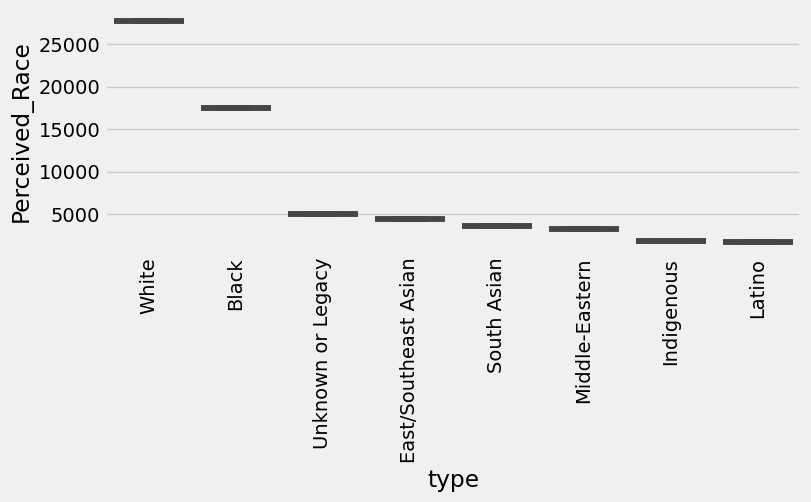

In [42]:
# Display the box-and-whisker plot of the counts for each unique value in the 'Perceived_Race' column of the data dataframe
plt.figure(figsize=(8,3), dpi=100)
sig = pd.DataFrame(c1)
sig['type'] = sig.index
sns.boxplot(x = 'type', y = 'Perceived_Race', data = sig)
plt.xticks(rotation=90)
plt.show()

whether there are any significant differences in the total number of strip searches conducted based on perceived race？

### T-test 3

In [43]:
import numpy as np
from scipy.stats import t, ttest_ind

# Create two subsets of the data for the Perceived_Race(White&South Asian) to compare
group1 = data[data['Perceived_Race'] == 'White']
group2 = data[data['Perceived_Race'] == 'South Asian']

# Calculate mean and standard deviation for each group
mean1 = np.mean(group1['StripSearch'])
mean2 = np.mean(group2['StripSearch'])
std1 = np.std(group1['StripSearch'])
std2 = np.std(group2['StripSearch'])

# Calculate the confidence interval for the difference between the means
n1 = len(group1)
n2 = len(group2)
df = n1 + n2 - 2
se = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / df * (1/n1 + 1/n2))
t_critical = t.ppf(0.975, df)
margin_of_error = t_critical * se
confidence_interval = (mean1 - mean2 - margin_of_error, mean1 - mean2 + margin_of_error)

# Perform two independent t-tests between the two groups
t_stat, p_value = ttest_ind(group1['StripSearch'], group2['StripSearch'])

# Print the results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean of group 1: {mean1}")
print(f"Mean of group 2: {mean2}")
print(f"Standard deviation of group 1: {std1}")
print(f"Standard deviation of group 2: {std2}")
print(f"Confidence interval: {confidence_interval}")
print(f"Degree Freedom: {df}")
print(f"Sample size of group 1:{n1}")
print(f"Sample size of group 2:{n2}")

T-test statistic: 9.94776630106247
P-value: 2.792578423891952e-23
Mean of group 1: 0.12862965768495474
Mean of group 2: 0.07113202324937724
Standard deviation of group 1: 0.334789588919378
Standard deviation of group 2: 0.25704524605179396
Confidence interval: (0.04616899620088823, 0.06882627267026677)
Degree Freedom: 31334
Sample size of group 1:27723
Sample size of group 2:3613


### T-test 4

In [44]:
import numpy as np
from scipy.stats import t, ttest_ind

# Create two subsets of the data for the Perceived_Race(White&Black) to compare
group1 = data[data['Perceived_Race'] == 'White']
group3 = data[data['Perceived_Race'] == 'Black']

# Calculate mean and standard deviation for each group
mean1 = np.mean(group1['StripSearch'])
mean3 = np.mean(group3['StripSearch'])
std1 = np.std(group1['StripSearch'])
std3 = np.std(group3['StripSearch'])

# Calculate the confidence interval for the difference between the means
n1 = len(group1)
n3 = len(group3)
df = n1 + n3 - 2
se = np.sqrt(((n1-1)*std1**2 + (n3-1)*std3**2) / df * (1/n1 + 1/n3))
t_critical = t.ppf(0.975, df)
margin_of_error = t_critical * se
confidence_interval = (mean1 - mean3 - margin_of_error, mean1 - mean3 + margin_of_error)

# Perform two independent t-tests between the two groups
t_stat, p_value = ttest_ind(group1['StripSearch'], group3['StripSearch'])

# Print the results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean of group 1: {mean1}")
print(f"Mean of group 3: {mean3}")
print(f"Standard deviation of group 1: {std1}")
print(f"Standard deviation of group 3: {std3}")
print(f"Confidence interval: {confidence_interval}")
print(f"Degree Freedom: {df}")
print(f"Sample size of group 1:{n1}")
print(f"Sample size of group 2:{n3}")

T-test statistic: -3.1320279316335236
P-value: 0.0017371398920229025
Mean of group 1: 0.12862965768495474
Mean of group 3: 0.13887937920803378
Standard deviation of group 1: 0.334789588919378
Standard deviation of group 3: 0.34582061424794347
Confidence interval: (-0.016663832643806133, -0.00383561040235195)
Degree Freedom: 45247
Sample size of group 1:27723
Sample size of group 2:17526


### Two-way ANOVA

In [45]:
#Delete rows with unclear sex of gender and null values
data = data[data['Sex'] != 'U']
data.shape

(65267, 25)

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data1 = data.copy()

# Fit a two-way ANOVA model with "Perceived_Race" and "sex" as factors
model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=data1).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                               sum_sq       df          F        PR(>F)
C(Perceived_Race)           42.425430      7.0  58.046535  1.939933e-83
C(Sex)                       7.000364      1.0  67.045357  2.700757e-16
C(Perceived_Race):C(Sex)     7.786977      7.0  10.654154  1.778725e-13
Residual                  6812.593171  65247.0        NaN           NaN


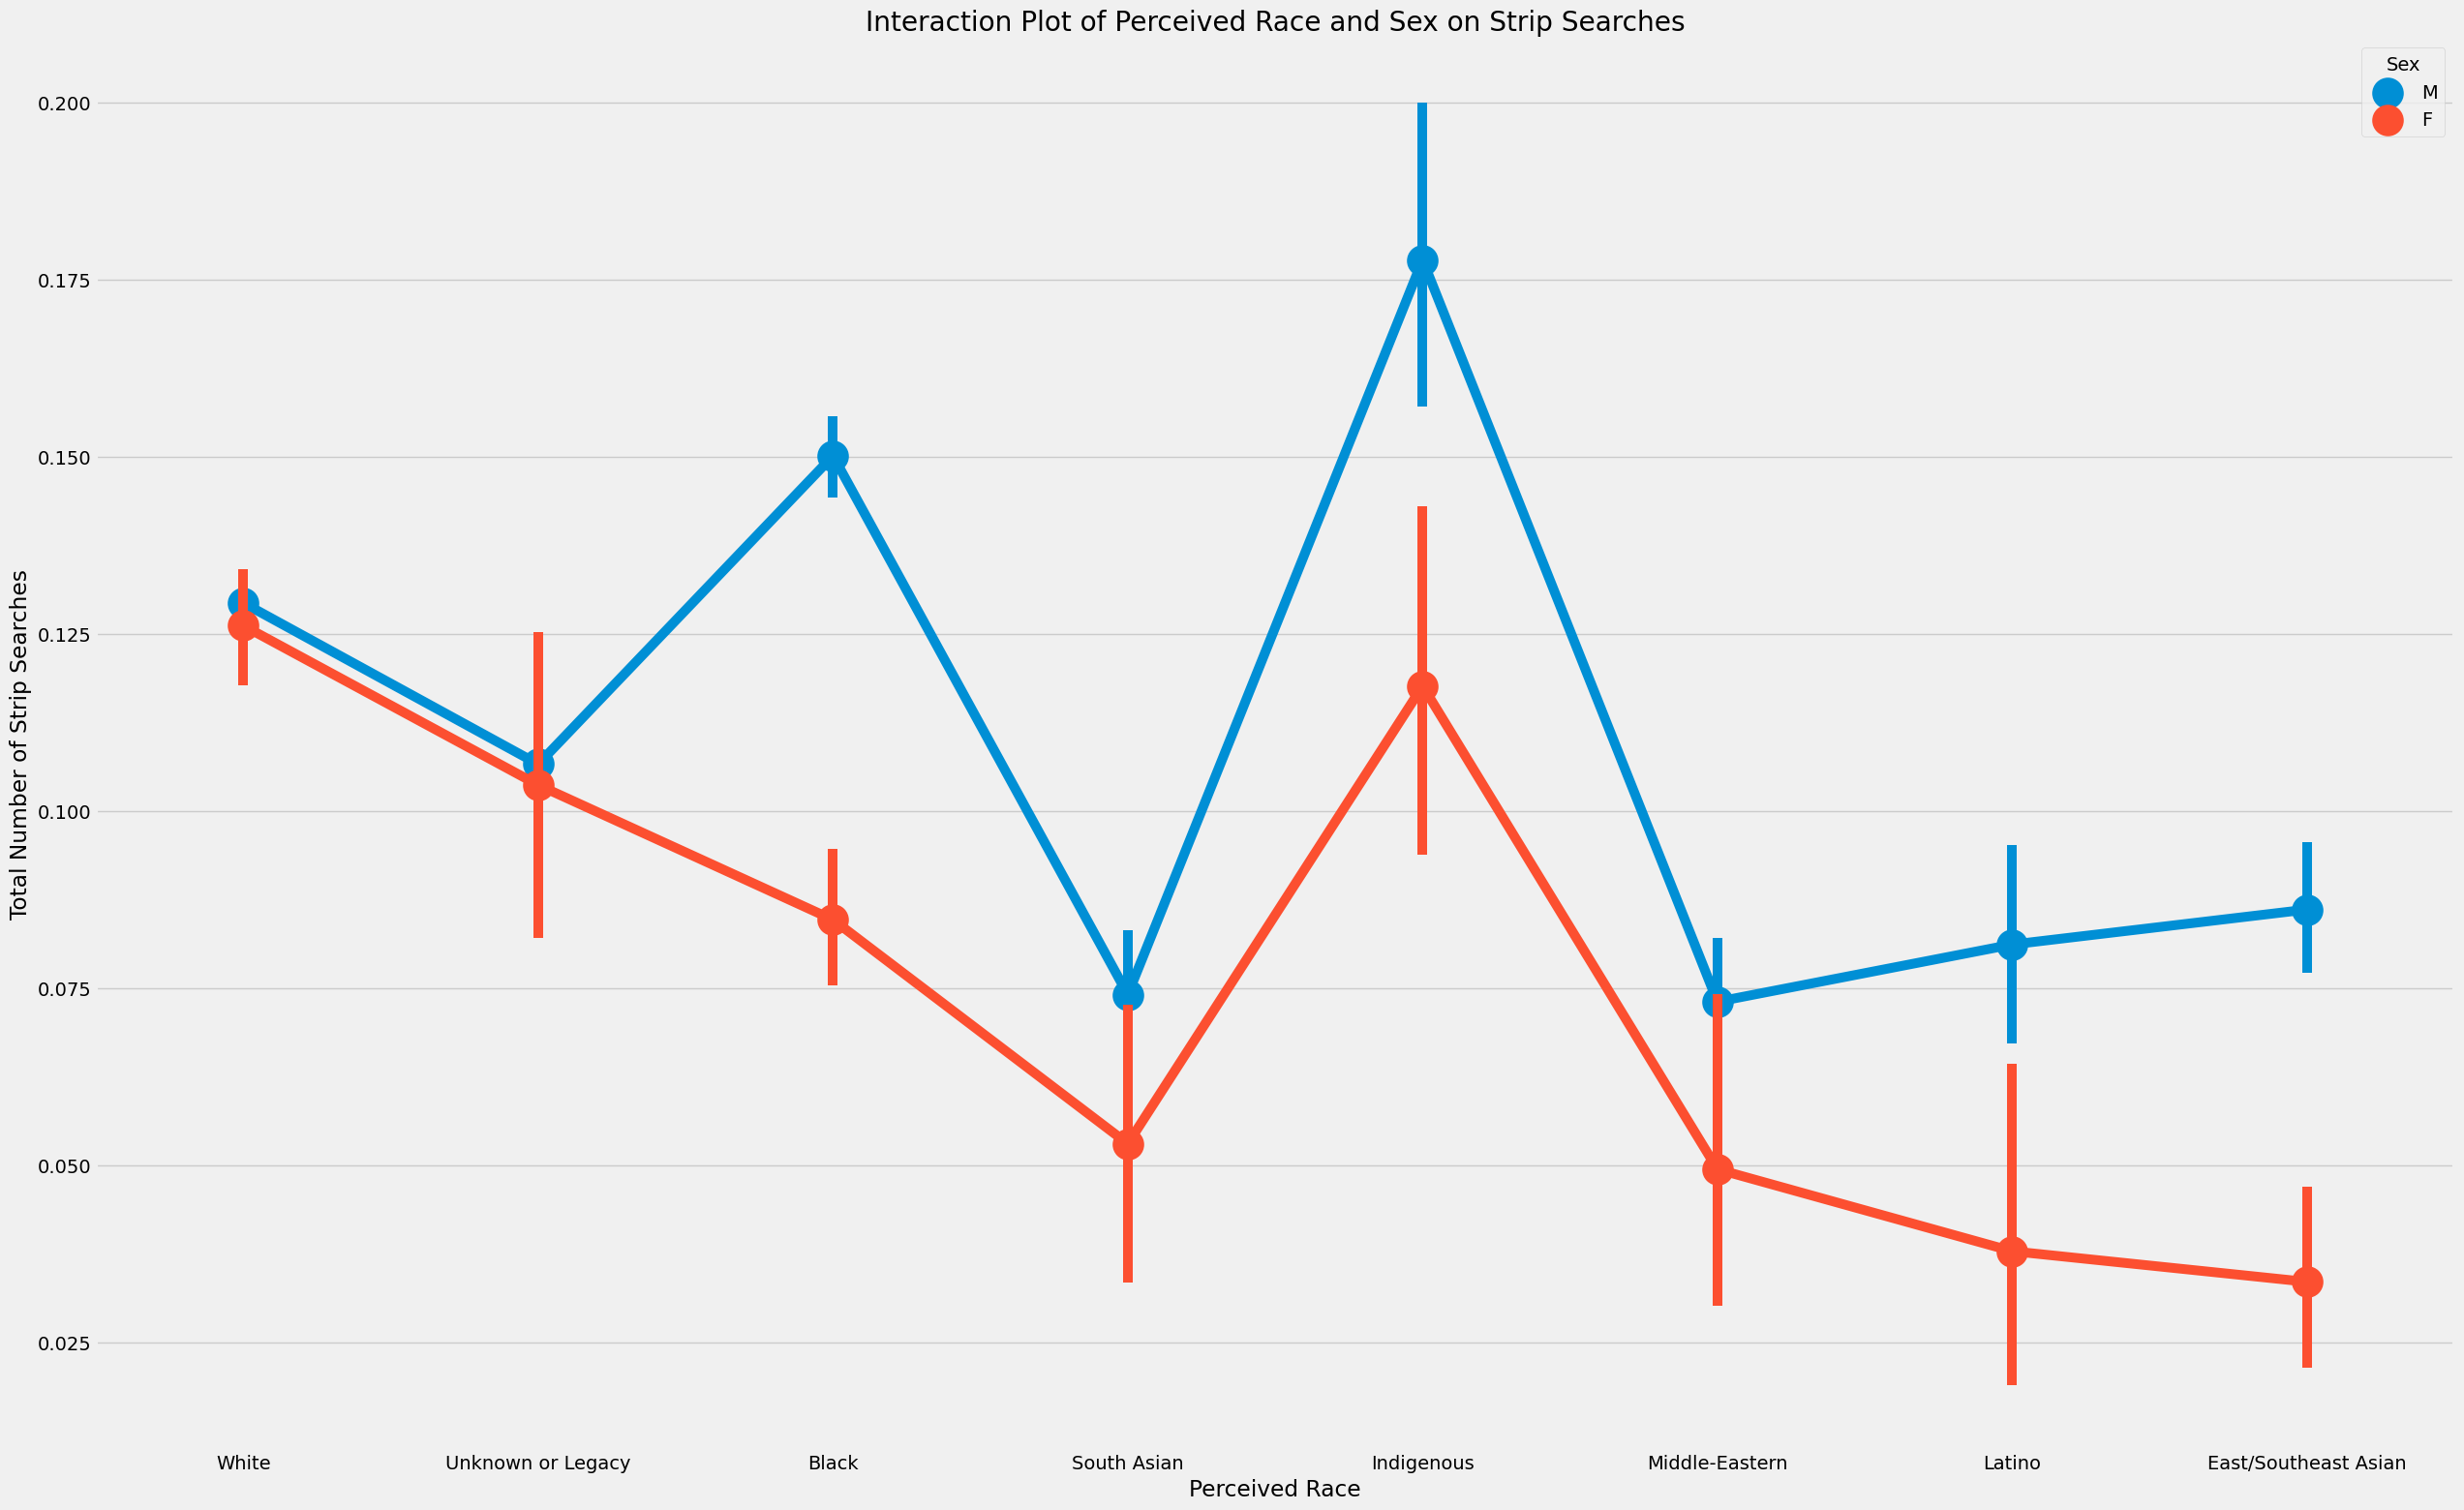

In [47]:
import seaborn as sns

# Use the pointplot function from Seaborn to create an interaction plot
sns.pointplot(x='Perceived_Race', y='StripSearch', hue='Sex', data=data1)

# Add labels for x and y axes and a title
plt.xlabel('Perceived Race')
plt.ylabel('Total Number of Strip Searches')
plt.title('Interaction Plot of Perceived Race and Sex on Strip Searches')
plt.show()